# K-Nearest Neighbors (K-NN)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')

x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

## Feature Scaling

In [4]:
from sklearn.preprocessing import StandardScaler

# scale: age and estimated salary
scaler = StandardScaler()
x_train= scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

## Training the K-NN model on the Training set

In [5]:
from sklearn.neighbors import KNeighborsClassifier

# metric: distance metric used to measure the similarity between data points
# p: relevant when the metric is set to 'minkowski'. It indicates the power parameter for the Minkowski distance calculation. When p=2, it becomes equivalent to using the Euclidean distance, and when p=1, it corresponds to the Manhattan distance. You can set p to any positive integer to represent different Minkowski distances.

classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

## Predicting a new result

In [6]:
pred_data = scaler.transform([[22, 100000]])
pred_result = classifier.predict(pred_data)

print(pred_result)

[0]


## Predicting the Test set results

In [7]:
# predict using the test data
y_pred = classifier.predict(x_test)

y_pred_reshaped = y_pred.reshape(len(y_pred), 1)
y_test_reshaped = y_test.reshape(len(y_test), 1)

# to compare the predicted results with the originals ones
concatenated = np.concatenate((y_pred_reshaped, y_test_reshaped), 1)
print(concatenated)

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]]


## Making the Confusion Matrix

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm) # 4 + 1 = 5 incorrect predictions (la suma de la matrix en diagonal)
#   [[54  4]
#   [ 1 21]]
accuracy_score(y_test, y_pred)

[[54  4]
 [ 1 21]]


0.9375

## Visualising the Training set results

/var/folders/8z/9lk7_58n1dzgvd97cfqznmxc0000gn/T/ipykernel_27556/2824021833.py:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


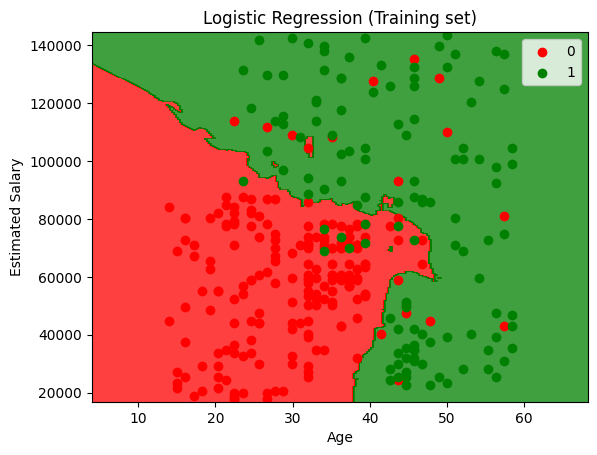

In [9]:
from matplotlib.colors import ListedColormap

X_set, y_set = scaler.inverse_transform(x_train), y_train

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))

plt.contourf(X1, X2, classifier.predict(scaler.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualising the Test set results

In [ ]:
from matplotlib.colors import ListedColormap

X_set, y_set = scaler.inverse_transform(x_test), y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))

plt.contourf(X1, X2, classifier.predict(scaler.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()